In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
# download mnist data and split into train and test
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


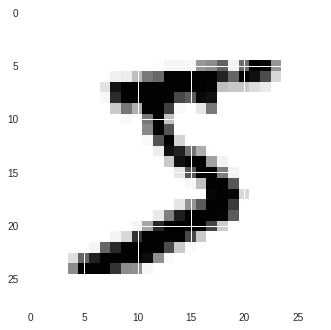

In [3]:
# EDA : plot the image
import matplotlib.pyplot as plt

# the first image
plt.imshow(X_train[0])

In [4]:
# shape of an image
X_train[0].shape

(28, 28)

In [0]:
# reshape the data to fit the model
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [0]:
# define validation data
X_val = X_test[:4000]
y_val = y_test[:4000]

In [8]:
# val data shape
X_val.shape, y_val.shape

((4000, 28, 28, 1), (4000,))

In [0]:
# new test data
X_test = X_test[4000:]
y_test = y_test[4000:]

In [10]:
# test data shape
X_test.shape, y_test.shape

((6000, 28, 28, 1), (6000,))

In [0]:
# to one-hot-encode the labels
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [12]:
# how the label is now
y_val[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

**Building the model**

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

In [0]:
# create model
model = Sequential()

# add layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [0]:
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
# train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5)

Train on 60000 samples, validate on 4000 samples
Epoch 1/5
60000/60000 [==============================] - 220s 4ms/step - loss: 0.7575 - acc: 0.9198 - val_loss: 0.1226 - val_acc: 0.9623
Epoch 2/5
60000/60000 [==============================] - 221s 4ms/step - loss: 0.0674 - acc: 0.9797 - val_loss: 0.1014 - val_acc: 0.9675
Epoch 3/5
60000/60000 [==============================] - 220s 4ms/step - loss: 0.0515 - acc: 0.9841 - val_loss: 0.0989 - val_acc: 0.9683
Epoch 4/5
60000/60000 [==============================] - 219s 4ms/step - loss: 0.0369 - acc: 0.9883 - val_loss: 0.1333 - val_acc: 0.9653
Epoch 5/5
60000/60000 [==============================] - 218s 4ms/step - loss: 0.0356 - acc: 0.9892 - val_loss: 0.1242 - val_acc: 0.9698


In [70]:
import numpy as np

pred = model.predict(X_test[:1])
i = np.where(pred == pred.max())
print(i[1])

[9]


In [67]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)